# Scientific Python Tutorial for Dummies

In [65]:
import numpy as np # pip install numpy
import pandas as pd # pip install pandas
# import scipy # pip install scipy
from matplotlib import pyplot as plt # pip install matplotlib
from scipy import signal

### Numpy
Work with matrices

Create matrix

In [66]:
m = np.array([1,2,3,4])
a = np.array([5,6,7,8])
ones = np.ones((10,1)) # create a matrix of ones of the given shape
zeros = np.zeros((20,1)) # create a matrix of zeros of the given shape

Perform Operations on matrices

In [67]:
print(m.reshape(2,2)) # reshape matrix to new dimension
print(np.concatenate([m,a], axis = 0)) # concatenation matrices
print(m*a) # element-wise multiplication similar to Matlab. Similar for division and addition
print(np.dot(m,a)) # dot product
print(np.matmul(m,a)) # matrix multiplication


[[1 2]
 [3 4]]
[1 2 3 4 5 6 7 8]
[ 5 12 21 32]
70
70


create an arbitary matrix, reshape

## Scipy - scientific functions
Probabily distributions, filters, MA models, Convolutions, Filters, Correlations -- Similar to Matlab or R, I believe. If not certain check docs.

In [68]:
a1 = np.random.randn(100,1) # random matrices are taken from numpy. However distributions are taken from scipy - check docs.
a2 = np.random.randn(100,1)
a_corr = signal.correlate(a1, a2) 
print(signal.correlate(a1, a2).shape)

(199, 1)


## Pandas - work with tabular data
If your data has strings, or you need operations similar to Excel -> Pandas. Have similar functions to numpy, scipy. Industry standard, used everywhere.

In [69]:
df = pd.DataFrame({'close':[0.1, 0.2, 0.3, 0.4], 'open': [0.0,0.1,0.2,0.3]})
print(df[0:3]) # slice your data Frame
print(df['close']) # slice your column
print(df.pop('close')) # pop your column - remove it from the data frame and return this column
print(df['open'])
print(df.drop(columns=['open'])) # drop your column - remove it from the dataframe and return the new dataframe

   close  open
0    0.1   0.0
1    0.2   0.1
2    0.3   0.2
0    0.1
1    0.2
2    0.3
3    0.4
Name: close, dtype: float64
0    0.1
1    0.2
2    0.3
3    0.4
Name: close, dtype: float64
0    0.0
1    0.1
2    0.2
3    0.3
Name: open, dtype: float64
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


## Plot Graphs - use matplotlib

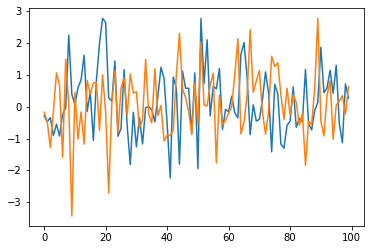

In [70]:
#  plot your noise
# simple plot
plt.plot(a1)
plt.plot(a2)

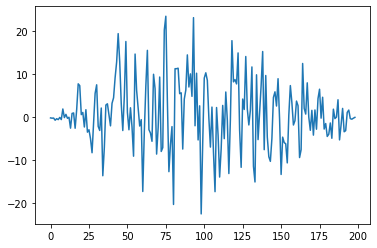

In [71]:
# advanced plot
# create figure and axis separately
plt.plot(a_corr)

## Generate Features - generate features
Use financial indicators from https://technical-analysis-library-in-python.readthedocs.io/en/latest/


In [85]:
# import financial indicators library
import ta
# load data from csv file
data = pd.read_csv('BTCUSDT_4h.csv')
# slice the last 400 data points
data = data[-400:]

In [86]:
data_ema = ta.trend.ema_indicator(data['close'])
# print data head first file datapoints
print(data_ema)

1611             NaN
1612             NaN
1613             NaN
1614             NaN
1615             NaN
            ...     
2006    56341.228097
2007    56497.436082
2008    56693.262839
2009    56863.587017
2010    56799.987476
Name: ema_12, Length: 400, dtype: float64


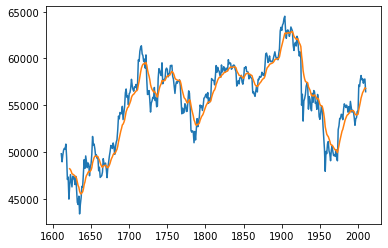

In [98]:
# plot data and data_ema
plt.plot(data['close'])
plt.plot(data_ema)

## Create and Test your signal system using Backtest - run your backtest

In [34]:
from backtest import Backtest, Random_Strategy


In [103]:
# random strategy
# Give it ticker get random signal
# signals
# -1 - Sell
# 0 - Idle
# 1 - Buy

class Random_Strategy:
    def __init__(self, *args, **kwargs):
        self._last_signal = None
    
    def get_signal(self,ticker):
        return np.random.randint(-1,2)

-0.0026316993884947237
269
Correlation: 0.6569111056944105


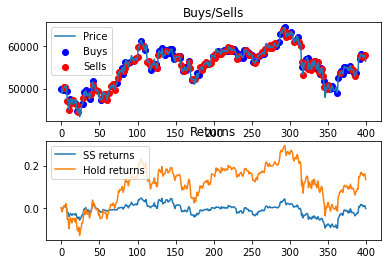

In [104]:
# create your backtest
balance_counter =  100
w1 = 1
bt = Backtest(balance_counter*w1, order_volume_prop=0.2)

# read your tickers
tickers = pd.read_csv('BTCUSDT_4h.csv')
#slice tickers 
tickers = tickers[-400:]
tickers = tickers.reset_index()
N = len(tickers)
random_strategy = Random_Strategy()


for i in range(N):
    # signal = signals[i]
    ticker = tickers.iloc[i]
    signal = random_strategy.get_signal(ticker)

    bt.run(ticker,signal)


print(bt.get_return())
print((bt.total_trades()))
# computes correlation between trading returns and hold
print('Correlation: {}'.format(bt.get_correlation()))
fig = bt.visualise()
plt.show()


## Machine Learning - Sklearn and XGBoost

In [ ]:
import sklearn
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# prepare your data
# lets predict the next price from previous 10 prices and ema prices
# your X will be 10 close prices and 10 ema prices and your y will be the next price



## Neural Networks - using PyTorch
Same as above we predict the next price from previous prices using neural networks

### Full-Connected ANN

### Recurrent Neural Networks

### LSTM

## Create a Strategy which uses Machine Learning

In [ ]:
class MLStrategy():
    def __init__(self, model) -> None:
        # save your model
        self.model = model
        self.prev_price
        self.X
        
    def get_signal(self, ticker):
        price = ticker['close']
        # update inputs for your model
        # update price
        # update EMAs
        # self.X
        pred_price = self.model.predict(self.X)

        if pred_price > 1.1*self.prev_price:
            # if price will go up by more than 10 per cent => buy
            return 1

        elif pred_price < 0.9*self.prev_price:
            # if price will be lower by more than 10 percent => sell
            return -1
        
        else:
            # do nothing => Idle
            return 0
